## Welcome to Data Science using Python Pandas 🐼

In this notebook, we'll take a first dip into using Python to analyze data sets and make discoveries using those data. At the end of this notebook, you'll explore the dataset that you'll be using for your term project.

The methods we'll use here are often referred to as "data science" - a methodology that uses computation, statistics, and visualization to gain insights from data. We'll be using a popular data science package called Pandas.

To get started, make a folder called `Pandas` in your `SCI10` folder. Then copy the `Songs.csv`, `Cities.csv`, and `Replicates_ChinoChinoCreek.csv` files (links given in the canvas assignment page) into your `Pandas` folder.

These files are in `.csv` ("comma separated values") format, which is a format that Excel, Google Sheets, Numbers, and many other spreadsheet software packages use.

Next, open that `Songs.csv` file in Google Sheets. It's a file that Chat-GPT made for us with a set of popular songs and some information on those songs.





**Part 1**

Open the `Songs.csv` file in Google sheets (you should be able to double-click on this file in the drive and it will open with Google sheets) or, if you prefer, download it to your computer and open it in Excel. How many rows and columns are in this sheet?

<font color = "red">10 rows, 5 columns.</font>


### Preparing to read files from our Google Drive

You'll be reading datasets that you've saved in your own Google Drive. To do that, you need to give Colab permission to access your files. You'll need to run this code cell.

<font color = "green">Remember... If you leave your notebook for a while, you'll need to run this code cell again because Colab "disconnects" from your Google Drive folder after being idle.</font>

In [1]:
# Allowing Colab to access files in your Google Drive

import io
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Reading a specific file from our Google Drive

Next, we need to import the pandas data science package and read a file from your Google Drive. Make sure that you've installed the `Songs.csv` file in a folder in your . Then, run the code cell below to read that file.

In [2]:
import pandas

songsDataFrame = pandas.read_csv("/content/drive/MyDrive/SCI10/Pandas/Songs.csv")

### Viewing the DataFrame with `.head`

Adding `.head` to the end of the name of your DataFrame will show you the first five lines of the DataFrame.

In [3]:
songsDataFrame.head()

,Song Name,Artist,Year Recorded,Weeks in Billboard Top 10,BPM
0,Happy,Pharrell Williams,2014,22,160
1,Anti-Hero,Taylor Swift,2022,29,97
2,Rockstar,Post Malone,2017,32,160
3,Uptown Funk,Mark Ronson,2014,31,115
4,Shape of You,Ed Sheeran,2017,33,96


What if you want to all of the rows of the DataFrame? First, we can use the `len` function to find the length (number of rows) of the DataFrame - just like we use `len` to find the length of a string, list, or dictionary!

In [4]:
numRows = len(songsDataFrame)
print("The songsDataFrame has this many rows:", numRows)

The songsDataFrame has this many rows: 9


Now, we can give `.head` the number of rows of the DataFrame that we'd like to see.

In [5]:
songsDataFrame.head(numRows)

,Song Name,Artist,Year Recorded,Weeks in Billboard Top 10,BPM
0,Happy,Pharrell Williams,2014,22,160
1,Anti-Hero,Taylor Swift,2022,29,97
2,Rockstar,Post Malone,2017,32,160
3,Uptown Funk,Mark Ronson,2014,31,115
4,Shape of You,Ed Sheeran,2017,33,96
5,Blinding Lights,The Weeknd,2019,57,171
6,Blank Space,Taylor Swift,2014,22,95
7,Can't Feel My Face,The Weeknd,2015,25,108
8,Circles,Post Malone,2019,39,120


### Building a new DataFrame for a specific column

We can make a new DataFrame for just a particular column in our DataFrame. We use square brackets `[` and `]` (similar to dictionaries) to do that:

In [6]:
songsOnlyDataFrame = songsDataFrame["Song Name"]  # Make a new DataFrame for just this column
songsOnlyDataFrame.head(numRows)                  # Show all of the rows

,Song Name
0,Happy
1,Anti-Hero
2,Rockstar
3,Uptown Funk
4,Shape of You
5,Blinding Lights
6,Blank Space
7,Can't Feel My Face
8,Circles


### Building a new DataFrame for a set of columns

If we want to build a new DataFrame for more than one column, we put all of those column names in a list. Notice the double `[` `[` and `]` `]` here! The outer `[` `]` are used to access the DataFrame. The inner ones are because we are providing a _list_ of column names.

In [7]:
songsAndArtistsDataFrame = songsDataFrame[["Song Name", "Artist"]]
songsAndArtistsDataFrame.head(numRows)

,Song Name,Artist
0,Happy,Pharrell Williams
1,Anti-Hero,Taylor Swift
2,Rockstar,Post Malone
3,Uptown Funk,Mark Ronson
4,Shape of You,Ed Sheeran
5,Blinding Lights,The Weeknd
6,Blank Space,Taylor Swift
7,Can't Feel My Face,The Weeknd
8,Circles,Post Malone


**Part 2**

Make a new code cell below. In that code cell...

   1. Make a new DataFrame called `songsAndWeeksDataFrame` that contains just the song names and the number of weeks in the billboard top 10.
   2. Display the entirety (all rows) of your new DataFrame using the `.head` thing that we saw above.

In [9]:
# PLEASE PROVIDE YOUR SOLUTION BELOW
songsAndArtistsDataFrame = songsDataFrame[["Song Name", "Weeks in Billboard Top 10"]]
songsAndArtistsDataFrame.head(numRows)


,Song Name,Weeks in Billboard Top 10
0,Happy,22
1,Anti-Hero,29
2,Rockstar,32
3,Uptown Funk,31
4,Shape of You,33
5,Blinding Lights,57
6,Blank Space,22
7,Can't Feel My Face,25
8,Circles,39


### Selecting specific rows requires using masks 😷

We've seen how to select one more columns from a DataFrame. Next, we'll see how to select a specific set of rows.

Selecting rows is based on the concept of a **mask**. A mask is a list of Booleans (recall that a Boolean is a value `True` or `False`). Specifically, the mask is a list of Booleans whose length is the number of rows in our DataFrame.

As an example, take a look at the mask below which we've called `mask1`. Notice that is a list of 9 Booleans because our `songsDataFrame` has nine rows.

In line 2 in the code cell below, we are using that mask to select all of those rows where the Boolean is `True`. In this case, its the row at index 0 and the row at index 2. The new DataFrame that we've made, which we've named `DataFrame1`, contains just rows 0 and 2.

In [10]:
mask = [True, False, True, False, False, False, False, False, False] # 9 entries, one for each row!
DataFrame1 = songsDataFrame[mask]
DataFrame1.head(numRows)

,Song Name,Artist,Year Recorded,Weeks in Billboard Top 10,BPM
0,Happy,Pharrell Williams,2014,22,160
2,Rockstar,Post Malone,2017,32,160


Why is a list like this called a "mask"? A mask lets some things through and hides others. That's what these Boolean masks are doing too!

**Part 3**

Make a new code cell below. In that code cell...

   1. Make a mask to pick out only the **first three rows** of the `songsDataFrame`. (_Hint:_ You can make a list of 9 Booleans by hand, or you can save a bit of time and use the fact that lists can be multiplied by numbers, e.g., `[True] * 9` makes a list with `9` copies of `True`. That's not exactly what you want, because this mask would keep all 9 rows.)
   2. Using that mask, make a new DataFrame that contains only the first three rows of the `songsDataFrame`.
   3. Use the `.head` thing to display all of the rows of your new DataFrame.

In [13]:
# PLEASE PROVIDE YOUR SOLUTION BELOW
mask = [True, True, True, False, False, False, False, False, False] # 9 entries, one for each row!
DataFrame1 = songsDataFrame[mask]
DataFrame1.head(numRows)


,Song Name,Artist,Year Recorded,Weeks in Billboard Top 10,BPM
0,Happy,Pharrell Williams,2014,22,160
1,Anti-Hero,Taylor Swift,2022,29,97
2,Rockstar,Post Malone,2017,32,160


#### Fancier masks

Pandas has a number of ways to make masks "automatically".
Here's one example. It is saying, _make a mask (one Boolean for each row) in which the value is `True` if the `Artist` value is equal to the string `"Taylor Swift"` (and, implicitly, `False` otherwise)._

In [14]:
mask = songsDataFrame["Artist"] == "Taylor Swift"
print(mask)


0    False
1     True
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: Artist, dtype: bool


Sequences of things can generally be converted into lists if you prefer to have a list version (although, we usually won't have a need to do that conversion).

In [15]:
masklist = list(mask)
print(masklist)

[False, True, False, False, False, False, True, False, False]


Returning to our mask, we can use that mask to make a new DataFrame for all rows where the mask value is `True`, that is, for all rows where the `Artist` is `"Taylor Swift"`.

In [16]:
swiftDataFrame = songsDataFrame[mask]
swiftDataFrame.head(numRows)

,Song Name,Artist,Year Recorded,Weeks in Billboard Top 10,BPM
1,Anti-Hero,Taylor Swift,2022,29,97
6,Blank Space,Taylor Swift,2014,22,95


Here's another example of making a mask, in this case it's one Boolean value for each row based on whether the `Weeks in Billboard Top 10` value is at least 30.

In [17]:
mask = songsDataFrame["Weeks in Billboard Top 10"] >= 30
print(mask)

0    False
1    False
2     True
3     True
4     True
5     True
6    False
7    False
8     True
Name: Weeks in Billboard Top 10, dtype: bool


In [18]:
manyWeeksDataFrame = songsDataFrame[mask]
manyWeeksDataFrame.head(numRows)

,Song Name,Artist,Year Recorded,Weeks in Billboard Top 10,BPM
2,Rockstar,Post Malone,2017,32,160
3,Uptown Funk,Mark Ronson,2014,31,115
4,Shape of You,Ed Sheeran,2017,33,96
5,Blinding Lights,The Weeknd,2019,57,171
8,Circles,Post Malone,2019,39,120


**Part 4**

Make a new code cell below.

From your `songsDataFrame`, make a new DataFrame called `mediumBeatDataFrame` that contains only those songs whose BPM is between 100 and 125. To do that:
   1. First make a mask to select those rows whose BPM is 100 or more.
   2. Use that mask to make a new intermediate DataFrame from `songsAndWeeksDataFrame` whose beat is 100 or more.
   3. In that new DataFrame, make a mask to select those rows whose BPM is 125 or less.
   4. Use that mask to make a new DataFrame from your intermediate DataFrame to make the `mediumBeatDataFrame`.
   5. Use the `.head` thing to display all of the rows of your `mediumBeatDataFrame`.


In [31]:
# PLEASE PROVIDE YOUR SOLUTION BELOW
mask = songsDataFrame["BPM"] >= 100
songBeatDataFrame = songsDataFrame[mask]

mask = songBeatDataFrame["BPM"] <= 125
mediumBeatDataFrame = songBeatDataFrame[mask]
mediumBeatDataFrame.head(numRows)



,Song Name,Artist,Year Recorded,Weeks in Billboard Top 10,BPM
3,Uptown Funk,Mark Ronson,2014,31,115
7,Can't Feel My Face,The Weeknd,2015,25,108
8,Circles,Post Malone,2019,39,120


Pandas has many neat feature for making masks, allowing you to select the rows of interest using many different criteria. For now, here's one more. It's the "is in" feature. Take a look and you'll figure out what it's doing!

In [20]:
mask = songsDataFrame["Year Recorded"].isin([2019, 2020])
print(mask)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8     True
Name: Year Recorded, dtype: bool


**Part 5**

That `isin` feature for making masks is handy! Make a new code cell below and, in that cell, make a new DataFrame from the `songsDataFrame` called `slowBeatsDataFrame` that contains all songs whose BPM is between 90 and 115 (including 90 and 115) using a _single_ mask and the `.isin` feature for making Boolean masks. Use the `.head` feature to show all of the rows in your new DataFrame.

To that end, recall that `list(range(X, Y))` makes a list of all counting numbers between X and Y, stopping one short of Y. So, `list(range(10, 20))` produces the list `[10, 11, 12, ..., 19]`.

In [25]:
# PLEASE PROVIDE YOUR SOLUTION BELOW
mask = songsDataFrame["BPM"].isin(list(range(90, 115)))

slowBeatsDataFrame = songsDataFrame[mask]
slowBeatsDataFrame.head(numRows)




,Song Name,Artist,Year Recorded,Weeks in Billboard Top 10,BPM
1,Anti-Hero,Taylor Swift,2022,29,97
4,Shape of You,Ed Sheeran,2017,33,96
6,Blank Space,Taylor Swift,2014,22,95
7,Can't Feel My Face,The Weeknd,2015,25,108


### Getting statistics from our data

We often want to compute some statistics from a column of data. Pandas offers many ways to do that. Here are a few examples using the `BPM` column. First, we are making a new DataFrame that contains only the `BPM` column from our `manyWeeksDataFrame`. That's a single column of data, so we then compute the mean, standard deviation, sum, minimum, maximum.

In [26]:
manyWeeksBPMDataFrame = manyWeeksDataFrame["BPM"]
manyWeeksBPMDataFrame.head(numRows)

,BPM
2,160
3,115
4,96
5,171
8,120


In [27]:
print(manyWeeksBPMDataFrame.mean())
print(manyWeeksBPMDataFrame.std())
print(manyWeeksBPMDataFrame.sum())
print(manyWeeksBPMDataFrame.min())
print(manyWeeksBPMDataFrame.max())


132.4
31.753739937210547
662
96
171


**Part 6**

Make a new code cell below. In that code cell...

   1. Use `.max` and `.min` to compute and `print` the difference between the largest and smallest BPMs of the songs in the original `songsDataFrame`.
   2. Next, find and `print` the median BPM value in that DataFrame. You can probably guess how do that, but you're also welcome to do a web search on something like "compute the median value in a Pandas DataFrame". (In general, web searches for things like this are useful - we do that all the time ourselves!)_In any case, you should find the median using a Pandas feature that does that rather than finding it by hand._

In [45]:
# PLEASE PROVIDE YOUR SOLUTION BELOW
songsDataFrame = songsDataFrame["BPM"]
difference = (songsDataFrame.max())-(songsDataFrame.min())
print(difference)

median = (songsDataFrame.median())
print(median)




76
115.0


### Working with a bigger dataset

Let's now revisit and build on the skills that we've acquired to work with a larger dataset, in this case a dataset of cities from around the world with their air quality and water pollution scores.

First, make sure that the `Cities.csv` file is in your Google Drive.
Open that file up using Google sheets and take a look at the data.

The `AirQuality` scores are from 0 to 100, where 100 is the best and 0 is the worst. The `WaterPollution` scores are from 0 to 100 where 0 is the best and 100 is the worst.

You may notice that some rows are missing some data (e.g., population data wasn't recorded for all cities).

Now, load that file into a DataFrame...

In [40]:
import pandas

citiesDataFrame = pandas.read_csv("/content/drive/MyDrive/SCI10/Pandas/Cities.csv")
citiesDataFrame.head()

,City,Region,Country,AirQuality,WaterPollution,Population
0,New York City,New York,United States of America,46.816038,49.504950,8399000.0
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,689545.0
2,San Francisco,California,United States of America,60.514019,43.000000,874961.0
3,Berlin,NaN,Germany,62.364130,28.612717,4890363.0
4,Los Angeles,California,United States of America,36.621622,61.299435,3980000.0


In [42]:
numRows = len(citiesDataFrame)
print("The Cities DataFrame has this many rows:", numRows)

The Cities DataFrame has this many rows: 4025


Let's take a look at the "entire" DataFrame. Python doesn't want to show it all, so it has a ... after line 5 and then skips to the end. Notice that in row 4022, the `Population` is `NaN`. That stands for "Not a Number" - that's because the spreadsheet was blank in that cell.

In [43]:
citiesDataFrame.head(numRows)

,City,Region,Country,AirQuality,WaterPollution,Population
0,New York City,New York,United States of America,46.816038,49.504950,8399000.0
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,689545.0
2,San Francisco,California,United States of America,60.514019,43.000000,874961.0
3,Berlin,NaN,Germany,62.364130,28.612717,4890363.0
4,Los Angeles,California,United States of America,36.621622,61.299435,3980000.0
...,...,...,...,...,...,...
4020,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000,331916.0
4021,Cordoba,Andalusia,Spain,85.714286,8.333333,323763.0
4022,Vic,Catalonia,Spain,100.000000,0.000000,NaN
4023,Segovia,Castile and Leon,Spain,100.000000,0.000000,51011.0


**Part 7**

Make a new code cell below. In that code cell...

   1. Make a new DataFrame from the `citiesDataFrame` that contains only the columns for `City`, `Country`,`AirQuality`, and `Population`. Call that DataFrame `df1`.
   2. From `df1`, make a new DataFrame, call it `df2`, for only those rows that are in North America (Canada, Mexico, and the United States America).
   3. From `df2`, make a new DataFrame, call it `df3`, with only those cities whose population is at least 500,000.
   3. From `df3`, make a new DataFrame, call it `df4`, with only those cities whose population is at most 2,000,000.
   3. From `df4`, make a new DataFrame, call it `df5`, that sorts those North American cities by `AirQuality` score from highest (best) to lowest (worst).
   4. From `df5`, make a new DataFrame, call it `df6`, that only contains the top 10 cities in that DataFrame.
   4. Use the `.head` feature to display all of the rows of that final `df6` DataFrame.

In [72]:
# PLEASE PROVIDE YOUR SOLUTION BELOW

df1 = citiesDataFrame[["City", "Country", "AirQuality", "Population"]]

mask = df1["Country"].isin(["Canada", "Mexico","United States of America"])
df2 = df1[mask]

mask = df2["Population"] >= 500000
df3 = df2[mask]

mask = df3["Population"] <= 2000000
df4 = df3[mask]

df5 = df4.sort_values("AirQuality", ascending = False)

df6 = df5.head(10)
print(df6)








               City                   Country  AirQuality  Population
865   Oklahoma City  United States of America   88.333333    681054.0
692        Columbus  United States of America   87.500000    905748.0
183          Ottawa                    Canada   84.563758   1068821.0
714          Tucson  United States of America   84.274194    542629.0
863     Albuquerque  United States of America   83.333333    564559.0
1474        Durango                    Mexico   83.333333    654876.0
211     Quebec City                    Canada   82.500000    733156.0
1140    Mississauga                    Canada   81.696429    717961.0
2024      Kitchener                    Canada   80.434783    522888.0
881         Calgary                    Canada   80.000000   1306784.0


### Plotting data (if you have time!)

We've been plotting data throughout the course (you could say that we've been "plotting along!") and here's a brief reminder of the key ideas before we apply them to DataFrames.

First, we import the plotting package and name it `plt` because that's a short and convenient name (you could have named it anything, but `plt` is short and descriptive).

In [75]:
import matplotlib.pyplot as plt

#### Scatter plots

Now, let's make a scatter plot. If we want to make a scatter plot of the points (5, 2), (3, 7), and (8, 12), we make a list of the x-values and a separate list of the y-values.

In [76]:
# Example of scatter plot using lists

xaxis = [5, 2, 8]
yaxis = [2, 7, 12]

Then, we plot them like this:

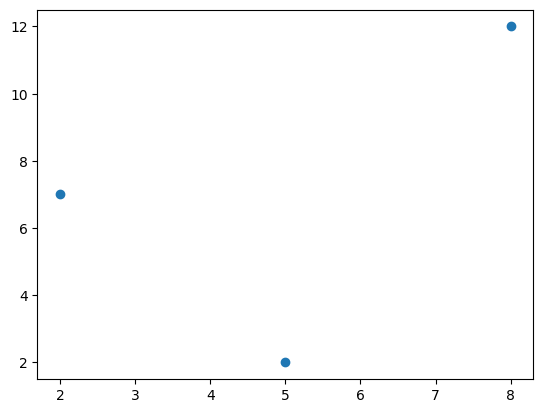

In [77]:
plt.scatter(xaxis, yaxis) # set up the plot
plt.show()                # display the plot on our screen

Similarly, we can the x-values and y-values from columns in a DataFrame. Columns in a DataFrame work _very much_ like lists.

Notice that we added the `xlabel`, `ylabel`, and `title`. All scientific plots should have those!

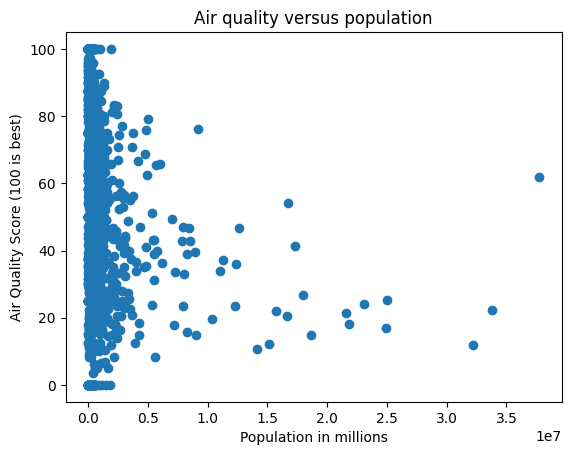

In [78]:
# Columns of a DataFrame behave like lists too!

xaxis = citiesDataFrame["Population"]
yaxis = citiesDataFrame["AirQuality"]

plt.xlabel("Population in millions")
plt.ylabel("Air Quality Score (100 is best)")
plt.title("Air quality versus population")
plt.scatter(xaxis, yaxis)
plt.show()

**Part 8**

Make a new code cell below and, in that cell, make a scatter plot for air quality versus population for the DataFrame that you made earlier of North American cities with populations between 500,000 and 2,000,000.

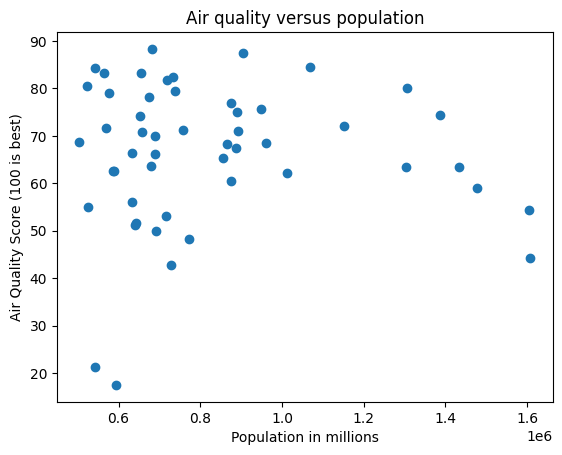

In [80]:
# PLEASE PROVIDE YOUR SOLUTION BELOW

xaxis = df4["Population"]
yaxis = df4["AirQuality"]

plt.xlabel("Population in millions")
plt.ylabel("Air Quality Score (100 is best)")
plt.title("Air quality versus population")
plt.scatter(xaxis, yaxis)
plt.show()





#### Bar plots

Similarly, we can make bar plots. Here, the x-axis is categorical. Notice that the `xaxis` list and the `yaxis` list have the same lengths (3 in this case).

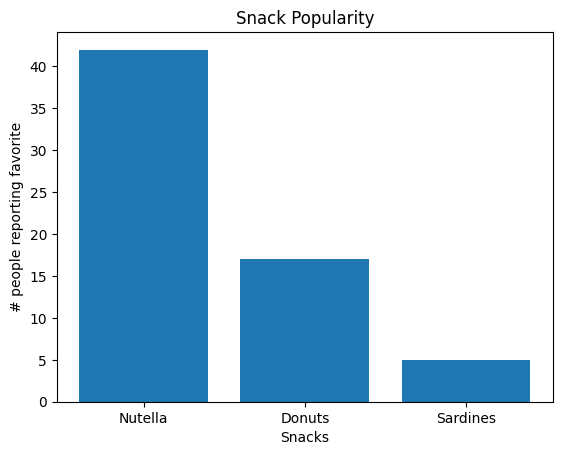

In [81]:
# Bar plot using lists

xaxis = ["Nutella", "Donuts", "Sardines"]
yaxis = [42, 17, 5]

plt.xlabel("Snacks")
plt.ylabel("# people reporting favorite")
plt.title("Snack Popularity")
plt.bar(xaxis, yaxis)
plt.show()

Similarly, we can get our data from a DataFrame. Take a careful look at what we did here!

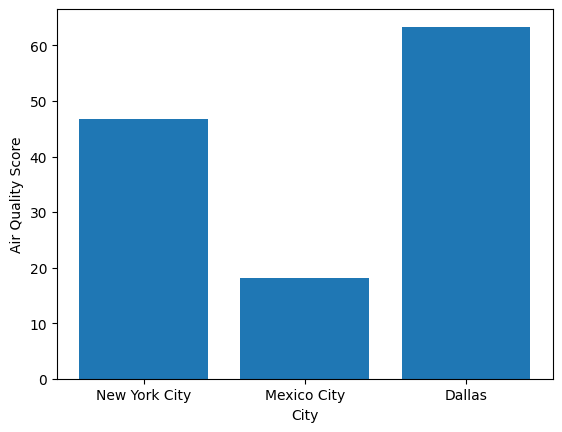

In [82]:
# Bar plot using DataFrames

cities = ["New York City", "Mexico City", "Dallas"]  # This will be our x-axis

# Make a DataFrame for just our cities of interest
mask = citiesDataFrame["City"].isin(cities)
threeCitiesDataFrame = citiesDataFrame[mask]

airQuality = threeCitiesDataFrame["AirQuality"]

plt.xlabel("City")
plt.ylabel("Air Quality Score")
plt.bar(cities, airQuality)
plt.show()



Next, we'd like to do the same thing as above, but for these three cities: Boston, Los Angeles, and Houston in the United States of America.

In the code cell below, we have the same thing as the one above, but we replaced the three cities with Boston, Los Angeles, and Houston.

Run the code cell. **It won't work**. We'll see why in a moment.

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (6,).

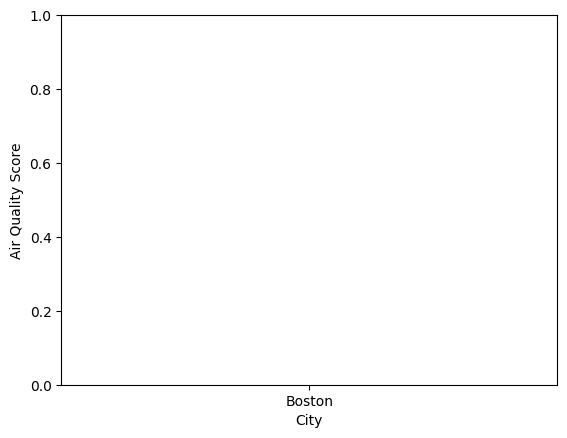

In [83]:
# Bar plot using DataFrames

cities = ["Boston", "Los Angeles", "Houston"]  # This will be our x-axis

# Make a DataFrame for just our cities of interest
mask = citiesDataFrame["City"].isin(cities)
threeCitiesDataFrame = citiesDataFrame[mask]

airQuality = threeCitiesDataFrame["AirQuality"]

plt.xlabel("City")
plt.ylabel("Air Quality Score")
plt.bar(cities, airQuality)
plt.show()

To see why it didn't work, we have the same thing below, but we removed the plotting part of the code and added line 9 to see the `threeCitiesDataFrame`.

In [84]:
# Bar plot using DataFrames

cities = ["Boston", "Los Angeles", "Houston"]  # This will be our x-axis

# Make a DataFrame for just our cities of interest
mask = citiesDataFrame["City"].isin(cities)
threeCitiesDataFrame = citiesDataFrame[mask]

threeCitiesDataFrame.head()


,City,Region,Country,AirQuality,WaterPollution,Population
4,Los Angeles,California,United States of America,36.621622,61.299435,3980000.0
14,Boston,Massachusetts,United States of America,78.235294,32.911392,675647.0
684,Houston,Texas,United States of America,45.860927,57.094595,2304580.0
699,Los Angeles,Biobio Region,Chile,12.500000,50.000000,3898747.0
2360,Boston,England,United Kingdom,62.500000,25.000000,64600.0


**Part 9**

Again, make a new code cell below.

Your next task is to fix the DataFrame below so that it draws the desired bar plot. To do that, you'll need to make a new DataFrame (called `finalDataFrame`) that selects only those cities in the `threeCitiesDataFrame` that are in the "United States of America".

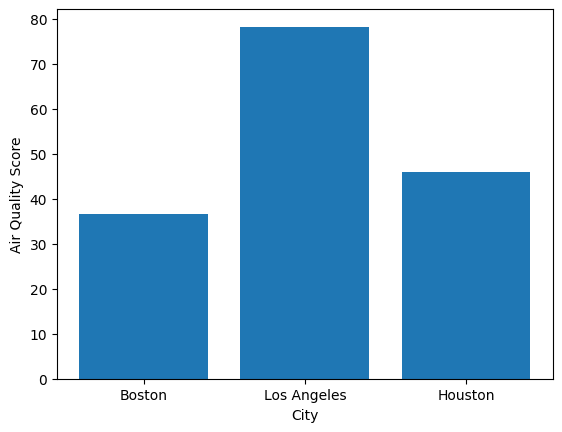

In [98]:
# Bar plot using DataFrames

cities = ["Boston", "Los Angeles", "Houston"]  # This will be our x-axis

# Make a DataFrame for just our cities of interest
mask = citiesDataFrame["City"].isin(cities)
threeCitiesDataFrame = citiesDataFrame[mask]

## COMPLETE THE TWO LINES OF CODE BELOW
mask2 = threeCitiesDataFrame["Country"].isin(["United States of America"])
finalDataFrame = threeCitiesDataFrame[mask2]

airQuality = finalDataFrame["AirQuality"]

plt.xlabel("City")
plt.ylabel("Air Quality Score")
plt.bar(cities, airQuality)
plt.show()

**Part 10**

Make new code cells below, one for each of the following tasks:

   1. Using the `citiesDataFrame`, make a new DataFrame that contains all cities in Germany with population between 250,000 and 1,000,000, sorted from best to worst Water Pollution score. For Water Pollution, 0 is the best and 100 is the worst. Display all of the rows of that DataFrame.

   2. Build a scatter plot for the DataFrame that has population on the x-axis and Water Pollution on the y-axis.

   3. Build a new DataFrame that sorts the DataFrame that you made above by population (largest to smallest) and then display the top five cities in that DataFrame.

   4. Build a bar plot for this DataFrame that has those five largest German cities from this dataset on the x-axis and their Water Pollution score on the y-axis.


In [104]:
# PLEASE PROVIDE YOUR SOLUTION TO PART 1 BELOW

mask = citiesDataFrame["Country"] == "Germany"
germany = citiesDataFrame[mask]

mask = (germany["Population"] >= 250000)
germany1 = germany[mask]

mask = (germany1["Population"] <= 1000000)
germany2 = germany1[mask]

sorted = germany2.sort_values("WaterPollution", ascending=True)

print(sorted)







              City                  Region  Country  AirQuality  \
201      Wuppertal  North Rhine-Westphalia  Germany   90.000000   
194          Essen  North Rhine-Westphalia  Germany   80.000000   
81       Karlsruhe       Baden-Wurttemberg  Germany   87.500000   
145        Dresden                  Saxony  Germany   75.000000   
197      Nuremberg                 Bavaria  Germany   75.000000   
91        Dortmund  North Rhine-Westphalia  Germany   75.000000   
751         Bremen                     NaN  Germany   78.750000   
76          Aachen  North Rhine-Westphalia  Germany   70.454545   
195        Leipzig                  Saxony  Germany   84.210526   
40            Bonn  North Rhine-Westphalia  Germany   82.812500   
137        Hanover            Lower Saxony  Germany   75.000000   
138     Dusseldorf  North Rhine-Westphalia  Germany   64.814815   
231        Munster  North Rhine-Westphalia  Germany   71.875000   
200         Bochum  North Rhine-Westphalia  Germany   68.18181

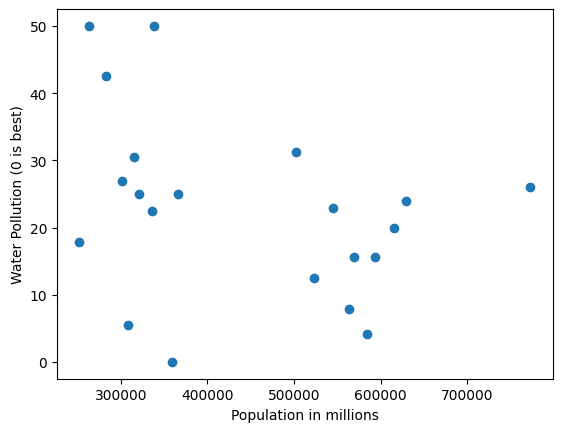

In [105]:
# YOUR SOLUTION TO PART 2 BELOW

xaxis = germany2["Population"]
yaxis = germany2["WaterPollution"]
plt.xlabel("Population in millions")
plt.ylabel("Water Pollution (0 is best)")
plt.scatter(xaxis, yaxis)
plt.show()

In [106]:
# YOUR SOLUTION TO PART 3 BELOW

sortedpop = germany2.sort_values("Population", ascending=False)
sortedpop.head(5)



,City,Region,Country,AirQuality,WaterPollution,Population
160,Frankfurt,Hesse,Germany,63.392857,25.980392,773068.0
138,Dusseldorf,North Rhine-Westphalia,Germany,64.814815,23.913043,629047.0
195,Leipzig,Saxony,Germany,84.210526,20.000000,616093.0
91,Dortmund,North Rhine-Westphalia,Germany,75.000000,15.625000,593317.0
194,Essen,North Rhine-Westphalia,Germany,80.000000,4.166667,584580.0


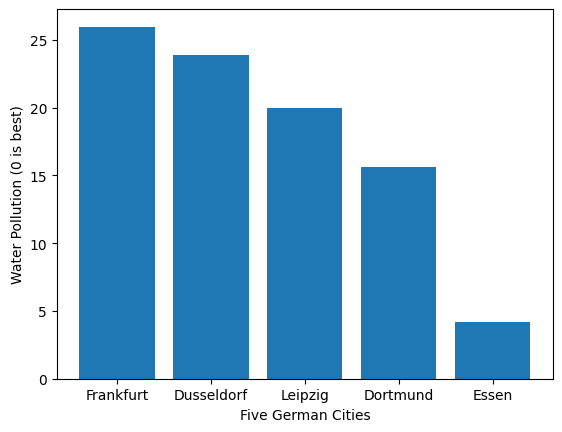

In [114]:
# YOUR SOLUTION TO PART 4 BELOW

top5 = sortedpop.head(5)
xaxis = top5["City"]
yaxis = top5["WaterPollution"]

plt.bar(xaxis, yaxis)
plt.xlabel("Five German Cities")
plt.ylabel("Water Pollution (0 is best)")
plt.show()

### Our Chino Creek Data!

Before we finish this notebook, we'd like you to take a look at the Chino Creek Data that you'll be using for your project.

The map below shows the five locations where we sampled bacteria in Chino Creek.

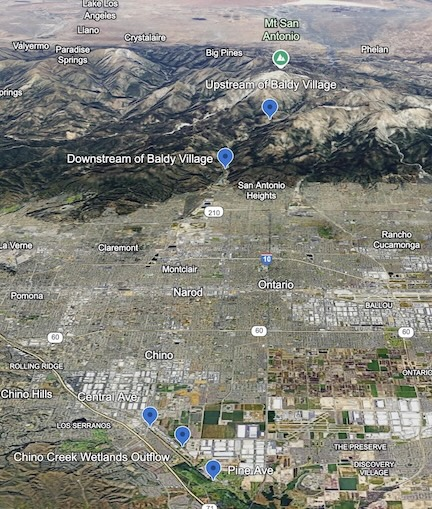

In [85]:
# Importing the data!
import pandas

pandas.options.display.max_colwidth=300   #This will help us view the entire taxon name!
pandas.options.display.max_columns=25     #This will print all columns!

drive.mount('/content/drive', force_remount=True)

countDataFrameReps = pandas.read_csv("/content/drive/My Drive/SCI10/Pandas/Replicates_ChinoCreek.csv")

Mounted at /content/drive


Recall that we can "see" the DataFrame in two different ways. We can `print` it or we can use `head`. By default, `head` shows only the first 5 rows, unless we specifically ask for more.

In [87]:
print(countDataFrameReps)

                                                                                                                                 Unnamed: 0  \
0                                                         k__Bacteria;p__Cyanobacteriota;c__Cyanobacteriia;o__Chloroplast;f__NA;g__NA;s__NA   
1                               k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__NA   
2                             k__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Acidovorax;s__NA   
3                    k__Bacteria;p__Pseudomonadota;c__Alphaproteobacteria;o__Sphingomonadales;f__Sphingomonadaceae;g__Novosphingobium;s__NA   
4                                             k__Bacteria;p__Chloroflexota;c__Anaerolineae;o__Anaerolineales;f__Anaerolineaceae;g__NA;s__NA   
...                                                                                                                                     ...   

Using `head` instead will nicely display the first 5 rows.

In [88]:
countDataFrameReps.head()

,Unnamed: 0,DS1.Bal.Dwn.S.R1,DS1.Bal.Dwn.S.R2,DS1.Bal.Dwn.S.R3,DS1.Bal.Dwn.W.R1,DS1.Bal.Dwn.W.R2,DS1.Bal.Dwn.W.R3,DS1.Bal.Up.S.R1,DS1.Bal.Up.S.R2,DS1.Bal.Up.S.R3,DS1.Bal.Up.W.R1,DS1.Bal.Up.W.R2,...,DS2.Pine.S.R1,DS2.Pine.S.R2,DS2.Pine.S.R3,DS2.Pine.W.R1,DS2.Pine.W.R2,DS2.Pine.W.R3,DS2.Wtlnds.S.R1,DS2.Wtlnds.S.R2,DS2.Wtlnds.S.R3,DS2.Wtlnds.W.R1,DS2.Wtlnds.W.R2,DS2.Wtlnds.W.R3
0,k__Bacteria;p__Cyanobacteriota;c__Cyanobacteriia;o__Chloroplast;f__NA;g__NA;s__NA,45325,45157,45459,1265,1211,1218,26157,26076,26099,1027,1046,...,4,2,2,26101,26093,26238,84724,84946,84162,13638,13530,13633
1,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__NA,200,179,207,3795,3827,3814,239,197,237,541,540,...,8,9,10,65364,65164,65640,64710,65145,65180,435824,436279,436265
2,k__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Acidovorax;s__NA,0,0,0,771,790,808,0,0,0,238,249,...,4,5,4,48175,48360,47911,12056,12005,11956,208055,207612,207659
3,k__Bacteria;p__Pseudomonadota;c__Alphaproteobacteria;o__Sphingomonadales;f__Sphingomonadaceae;g__Novosphingobium;s__NA,7315,7366,7265,411,412,444,554,567,569,0,0,...,2,1,4,9140,9117,9103,15133,15039,15194,168557,168302,168134
4,k__Bacteria;p__Chloroflexota;c__Anaerolineae;o__Anaerolineales;f__Anaerolineaceae;g__NA;s__NA,3133,3164,3131,288,311,289,862,868,888,34,31,...,1,0,2,500,491,486,186932,186743,186779,1252,1261,1236


Run the cell below to see the length of this DataFrame - that is, the number of rows.

In [89]:
print(len(countDataFrameReps))

3392


## Some observations about `countDataFrame`

This dataframe has 3392 rows. Each row corresponds to a bacterial taxon found at one or more of the five sites along Chino Creek where we took samples.

What about the columns? The first column is the taxon. They have long names! For instance, the first taxon in the `Taxon` column is

`"k__Bacteria;p__Cyanobacteriota;c__Cyanobacteriia;o__Chloroplast;f__NA;g__NA;s__NA"`

The taxon name includes the taxonomic information at each level of the taxonomy (k - kingdom, p - phylum, c - class, o - order, f - family, g - genus, s - species) separated by a `";"`. Notice that there are two underscores `__` after each level (k, p, etc.).

As part of the taxonomy assignment step, we may not be able to confidently assign a name at each level of the taxonomy hierarchy. For instance, it is often the case that we may not be able to confidently assign a species name to the observed taxon; in fact, we may not be able to confidently assign even a genus (or higher taxonomic level) name to this taxon! This happens either because the observed taxon may be a completely new species(!) or because we may not have enough resolving power from the DNA sequence data for this taxon. We use an `NA` label at a taxonomic level to denote such a situation. As you can see from the taxon name for the first taxon in our table, we could not confidently assign this taxon its taxonomy name at (and below) the `family` level.

The remaining 60 columns in `countDataFrameReps` are organized like this.

**Sample labeling:** Each sample begins with the prefix `DS1` or `DS2` prefix. Those correspond to two data collection times. `DS1` was collected in December 2023 and `DS2` was conducted after a major rain event in February 2024.

**Sampling locations:**
Following the `DS1` and `DS2` labels, we see the locadtion labels.
The five locations that we collected samples from are `Upstream of Baldy Village` (Bal.Up), `Downstream of Baldy Village` (Bal.Dwn), `Central Avenue` (Cen), `Chino Creek Wetlands Outflow` (Wtlnds), and `Pine Avenue` (Pine).

**Water or Sediment:** At each location, we collected
one sediment (S) sample and one water (W) sample.

**Replicate:** Finally, for each combination of data collection time, sample location, and water/sediment, we have **3 replicates**, `R1`, `R2`, and `R3`. This is will be useful in doing hypothesis testing. For example, if you wish to compare the means of two groups to see if there is a statistical difference, you can use a randomized permutation test to compute p-values using these replicates. More on that next time.

**60 columns of data:** There are 2 datasets (`DS1` and `DS2`), 2 sample types (`S`ediment or `W`ater), 5 locations along the creek, and 3 replicates of each, for a total of $2 \times 2 \times 5 \times 3 = 60$ columns of data that you can use to explore your scientific questions. That's a lot of data. It's likely that you won't need all of these data for your study, but it's all there so that you can extract what you need.

**Sample processing:** DNA was extracted from each of the 60 samples, and then the 16S rRNA genes in them were amplified using PCR (similar to the processing steps you carried out in the lab on the soil samples you collected in SCI10). The PCR products were subsequently sequenced using a DNA sequencing machine. This generated several million DNA sequences (these sequence data are stored as text files!). We then processed these data and estimated
the **`absolute abundance`** of each taxon in each sample. Those are the numbers that you see in the DataFrame.


**Part 11**

In the code cell below, use the `countDataFrameReps` DataFrame
make a new DataFrame called `dfBalDwnS` that contains just the `DS1` data set, for location `Baldy Down` (`Bal.Dwn`), sediment (`S`) only, all three replicates (`R1`, `R2`, and `R3`).



In [115]:
dfBalDwn = countDataFrameReps[["DS1.Bal.Dwn.S.R1", "DS1.Bal.Dwn.S.R2",	"DS1.Bal.Dwn.S.R3"]]

**Part 12** To better understand the data in these three replicates for `DS1.Bal.Dwn.S`, make a code cell below to compute and print the **minimum** abundance, **maximum** abundance, **mean**, standard deviation, and **median**. (_Note_: You can do that separately for each column or use `.mean(), `.std()`, etc for the entire `dfBalDwn` DataFrame and it will give you the values for each of the columns in that DataFrame.)


In [91]:
# PLEASE PROVIDE YOUR SOLUTION BELOW
mean = dfBalDwn.mean()
sd = dfBalDwn.std()
minimum = dfBalDwn.min()
maximum = dfBalDwn.max()
median = dfBalDwn.median()


print("Mean DS1.Bal.Dwn", mean)
print("Standard Deviation", sd)
print("Minimum", minimum)
print("Maximum", maximum)
print("Median", median)

Mean DS1.Bal.Dwn DS1.Bal.Dwn.S.R1    328.051297
DS1.Bal.Dwn.S.R2    328.051297
DS1.Bal.Dwn.S.R3    328.051297
dtype: float64
Standard Deviation DS1.Bal.Dwn.S.R1    2551.363844
DS1.Bal.Dwn.S.R2    2550.815305
DS1.Bal.Dwn.S.R3    2550.771131
dtype: float64
Minimum DS1.Bal.Dwn.S.R1    0
DS1.Bal.Dwn.S.R2    0
DS1.Bal.Dwn.S.R3    0
dtype: int64
Maximum DS1.Bal.Dwn.S.R1    67588
DS1.Bal.Dwn.S.R2    67387
DS1.Bal.Dwn.S.R3    67533
dtype: int64
Median DS1.Bal.Dwn.S.R1    0.0
DS1.Bal.Dwn.S.R2    0.0
DS1.Bal.Dwn.S.R3    0.0
dtype: float64


**Part 13**

Next, in the code cell below, make a new DataFrame from `dfBalDwn` that contains only those rows in which all three replicates have an abundance of at least 1000. Finally, print the number of rows in this DataFrame. (_Hint_: Do this in several steps. Each step will make a mask, use that mask to make a new DataFrame, and then use that DataFrame to make the next one, etc.)

In [96]:
# PLEASE PROVIDE YOUR SOLUTION BELOW

mask1 = dfBalDwn["DS1.Bal.Dwn.S.R1"] >= 1000
df1 = dfBalDwn[mask1]

mask2 = df1["DS1.Bal.Dwn.S.R2"] >= 1000
df2 = df1[mask2]

mask3 = df2["DS1.Bal.Dwn.S.R3"] >= 1000
df3 = df2[mask3]

print(df3)
print(len(df3))







      DS1.Bal.Dwn.S.R1  DS1.Bal.Dwn.S.R2  DS1.Bal.Dwn.S.R3
0                45325             45157             45459
3                 7315              7366              7265
4                 3133              3164              3131
6                17822             17873             17981
7                 3393              3496              3305
...                ...               ...               ...
711               1225              1221              1269
871               1626              1621              1639
920               1802              1819              1724
1002              2167              2154              2170
1381              1107              1085              1139

[140 rows x 3 columns]
140


**Part 14** Based on what you did in the code cell above, how many taxa have abundance of at least 1000 in all three columns of the `dfBalDwn` DataFrame?

<font color = "red">140</font>

### Congratulations!

You've just completed your first foray into data science! Time to submit on Canvas.